In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pytidycensus as tc
import requests

C:\Users\lukem\AppData\Local\Temp\ipykernel_8616\3992969218.py:5: UserWarning: Mapping functions unavailable due to import error: NameError. To use mapping features, ensure all dependencies are properly installed: pip install pytidycensus[map]
  import pytidycensus as tc


In [2]:
redfin_metro = pd.read_csv(r'C:\Users\lukem\OneDrive\Desktop\NSS\Capstone\Capstone-Project\Data\redfin_data.csv',encoding='utf-16',sep='\t')

In [3]:
redfin_metro['Median Sale Price'] = (redfin_metro['Median Sale Price'].str.replace('$','').str.replace('K','000').astype(float))

In [4]:
cols = ['Homes Sold', 'New Listings', 'Inventory']
for col in cols:
    redfin_metro[col] = redfin_metro[col].str.replace(',', '').astype(int)

In [5]:
redfin_metro['Month of Period End'] = pd.to_datetime(redfin_metro['Month of Period End'],format='%B %Y')

In [6]:
redfin_metro['Year'] = redfin_metro['Month of Period End'].dt.year

In [7]:
redfin_metro = redfin_metro[(redfin_metro['Year'] >= 2020) & (redfin_metro['Year'] <= 2023)]

In [8]:
redfin_metro.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,...,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,Year
83,"Nashville, TN metro area",2020-01-01,300000.0,-5.7%,2.9%,2195,-25.1%,16.2%,3092,57.4%,...,8572,2.5%,-7.6%,73,9.0,0.0,98.3%,-0.1%,0.3%,2020
84,"Nashville, TN metro area",2020-02-01,315000.0,5.0%,8.6%,2431,10.8%,15.3%,2998,-3.0%,...,8607,0.4%,-8.3%,72,-1.0,-6.0,98.5%,0.2%,0.1%,2020
85,"Nashville, TN metro area",2020-03-01,326000.0,3.4%,8.5%,2953,21.5%,7.5%,3756,25.3%,...,9043,5.1%,-6.0%,63,-9.0,-3.0,99.0%,0.4%,0.5%,2020
86,"Nashville, TN metro area",2020-04-01,327000.0,0.4%,7.7%,2579,-12.7%,-13.0%,3466,-7.7%,...,9535,5.4%,-7.5%,56,-7.0,-1.0,99.1%,0.1%,0.6%,2020
87,"Nashville, TN metro area",2020-05-01,325000.0,-0.6%,4.3%,2820,9.3%,-19.8%,3713,7.1%,...,9838,3.2%,-7.8%,53,-3.0,-3.0,98.9%,-0.2%,0.2%,2020


In [9]:
nashville_homes=pd.read_csv('Data/Nashville_home_sales_data.csv',low_memory=False)

In [10]:
nashville_homes.head()

,OBJECTID,APN,Feature Type,Floor Number,Parcel ID,Census Tract,Council District,Tax District,Owner,Sale Date,...,Is Regular Shape?,Land Use Code,Land Use Description,Land Appraised Value,Improvement Appraised Value,Total Appraised Value,Zoning,Shape__Area,Latitude,Longitude
0,1,186040A17200CO,Lot,NaN,361372.0,37019114.0,33.0,GSD,"CLARK, HERSHEL WAYNE",10/6/2021 5:00:00 AM,...,Y,011,SINGLE FAMILY,120000.0,338000.0,458000.0,R8,6786.003601,35.988913,-86.675994
1,2,186040A17300CO,Lot,NaN,361373.0,37019114.0,33.0,GSD,"COLLINS, SHIRLEY KAY",8/6/2025 10:00:00 AM,...,Y,011,SINGLE FAMILY,120000.0,327300.0,447300.0,R8,6786.550659,35.989030,-86.675877
2,3,186040A17500CO,Lot,NaN,361375.0,37019114.0,33.0,GSD,"FERGUSON, MARK A. & LAURA DURHAM",8/22/2014 5:00:00 AM,...,N,011,SINGLE FAMILY,120000.0,403500.0,523500.0,R8,8075.191406,35.989286,-86.675635
3,4,186040A18300CO,Lot,NaN,361383.0,37019114.0,33.0,GSD,"SCHMID, WILLIAM GRAY & DEE ANN",2/28/2025 12:00:00 PM,...,N,011,SINGLE FAMILY,120000.0,517100.0,637100.0,RS10,7368.593933,35.989512,-86.674079
4,5,186040A18400CO,Lot,NaN,361384.0,37019114.0,33.0,GSD,SFR JV-2 2024-2 BORROWER LLC,6/5/2024 5:00:00 AM,...,N,011,SINGLE FAMILY,120000.0,359200.0,479200.0,RS10,7048.799194,35.989502,-86.673896


In [11]:
single_family = nashville_homes[nashville_homes['Land Use Description'] == 'SINGLE FAMILY'].copy()

In [12]:
single_family['Sale Date'] = pd.to_datetime(single_family['Sale Date'])

In [13]:
single_family['Sale Year'] = single_family['Sale Date'].dt.year
single_family['Sale Month'] = single_family['Sale Date'].dt.month
single_family['Sale Month Name'] = single_family['Sale Date'].dt.month_name()

In [14]:
single_family_2020_2023 = single_family[single_family['Sale Year'].between(2020, 2023)].copy()

In [15]:
single_family_2020_2023.head()

,OBJECTID,APN,Feature Type,Floor Number,Parcel ID,Census Tract,Council District,Tax District,Owner,Sale Date,...,Land Appraised Value,Improvement Appraised Value,Total Appraised Value,Zoning,Shape__Area,Latitude,Longitude,Sale Year,Sale Month,Sale Month Name
0,1,186040A17200CO,Lot,NaN,361372.0,37019114.0,33.0,GSD,"CLARK, HERSHEL WAYNE",2021-10-06 05:00:00,...,120000.0,338000.0,458000.0,R8,6786.003601,35.988913,-86.675994,2021,10,October
7,8,186040A19300CO,Lot,NaN,361393.0,37019114.0,33.0,GSD,"KENNEDY, RONALD WILLIAM SR & DARLEEN GAIL",2020-04-17 05:00:00,...,120000.0,319300.0,439300.0,R8,6050.071777,35.988885,-86.675141,2020,4,April
11,12,186040A20900CO,Lot,NaN,361409.0,37019114.0,33.0,GSD,"TOLINE, ROBERT E",2023-02-22 06:00:00,...,120000.0,414600.0,534600.0,R8,9853.479431,35.988291,-86.675788,2023,2,February
14,15,041060A00800CO,Lot,NaN,361437.0,37010901.0,3.0,GSD,"ALEXANDER, VICTOR WENDELL & KEENA",2022-09-28 05:00:00,...,89000.0,403900.0,492900.0,RS20,10704.041748,36.271489,-86.774518,2022,9,September
24,25,041060A03800CO,Lot,NaN,361467.0,37010901.0,3.0,GSD,"VANLIER, ANTWAN J",2021-08-17 05:00:00,...,89000.0,268300.0,357300.0,RS20,10037.195190,36.270840,-86.773803,2021,8,August


In [16]:
mortgage_rate=pd.read_csv(r'C:\Users\lukem\OneDrive\Desktop\NSS\Capstone\Capstone-Project\Data/mortgage_rate_30.csv')

In [17]:
mortgage_rate['observation_date'] = pd.to_datetime(mortgage_rate['observation_date'])

In [18]:
mortgage_rate['Year'] = mortgage_rate['observation_date'].dt.year
mortgage_rate['Month_Name'] = mortgage_rate['observation_date'].dt.month_name()

In [19]:
mortgage_rate = mortgage_rate[(mortgage_rate['Year'] >= 2020) & (mortgage_rate['Year'] <= 2023)]

In [20]:
mortgage_rate = mortgage_rate.reset_index(drop=True)

In [21]:
mortgage_rate.head()

,observation_date,MORTGAGE30US,Year,Month_Name
0,2020-01-02,3.72,2020,January
1,2020-01-09,3.64,2020,January
2,2020-01-16,3.65,2020,January
3,2020-01-23,3.60,2020,January
4,2020-01-30,3.51,2020,January


In [22]:
API_KEY = '5206a3fd5690e9a1ab1ce6fb7d2fbdbd52895891'

In [23]:
zip_codes = ['37013','37015','37027','37064','37072','37076','37080',
             '37115','37122','37135','37138','37143','37189','37203',
             '37204','37205','37206','37207','37208','37209','37210',
             '37211','37212','37214','37215','37216','37217','37218',
             '37220','37221']

In [24]:
variables = {'B01003_001E': 'Population',
             'B19013_001E': 'MedianIncome',
             'B25077_001E': 'MedianHomeValue',
             'B25064_001E': 'MedianRent',
             'B25002_001E': 'TotalHousingUnits',
             'B25003_002E': 'OccupiedUnits',
             'B25003_003E': 'VacantUnits',
             'B17001_001E': 'PovertyUniverse',
             'B17001_002E': 'BelowPoverty'}

In [25]:
years = ['2020', '2021', '2022', '2023']

In [26]:
def get_acs_data(year):
    base_url = f'https://api.census.gov/data/{year}/acs/acs5'
    all_data = []
    for zcta in zip_codes:
        response = requests.get(base_url, params={
            'get': ','.join(variables.keys()),
            'for': f'zip code tabulation area:{zcta}',
            'key': API_KEY})
        if response.status_code == 200 and len(response.json()) > 1:
            row = response.json()[1]
            record = {'ZCTA': zcta, 'ACS_Year': year}
            for i, var in enumerate(variables.keys()):
                record[variables[var]] = row[i]
            all_data.append(record)
        else:
            print(f'No data for ZCTA {zcta} in {year}')
    return pd.DataFrame(all_data)

In [27]:
df_list = []
for year in years:
    print(f'Pulling ACS {year} data...')
    df_year = get_acs_data(year)
    df_list.append(df_year)
census_data = pd.concat(df_list, ignore_index=True)

Pulling ACS 2020 data...
Pulling ACS 2021 data...
Pulling ACS 2022 data...
Pulling ACS 2023 data...


In [28]:
census_data

,ZCTA,ACS_Year,Population,MedianIncome,MedianHomeValue,MedianRent,TotalHousingUnits,OccupiedUnits,VacantUnits,PovertyUniverse,BelowPoverty
0,37013,2020,99109,60602,205800,1182,39126,20207,16010,98569,15801
1,37015,2020,17835,59144,175400,984,7631,4993,1828,17418,2023
2,37027,2020,57096,133254,627700,1621,21514,17154,3454,56934,1812
3,37064,2020,60272,105342,460900,1469,22985,17191,4604,60037,4247
4,37072,2020,31134,62655,237500,1123,13516,8869,4000,30682,3245
...,...,...,...,...,...,...,...,...,...,...,...
115,37216,2023,18933,82134,404100,1507,9574,6408,2530,18872,1468
116,37217,2023,31440,61529,279400,1313,14168,5664,6954,31349,5792
117,37218,2023,15284,59073,295400,1368,6497,4315,1758,14396,2987
118,37220,2023,5483,156227,746000,1468,2364,2040,237,5483,244


In [29]:
census_data['ZCTA'] = census_data['ZCTA'].astype(int)

In [30]:
numeric_cols = ['ACS_Year','Population','MedianIncome','MedianHomeValue','MedianRent','TotalHousingUnits',
                'OccupiedUnits','VacantUnits','PovertyUniverse','BelowPoverty']

In [31]:
for col in numeric_cols:
    census_data[col] = pd.to_numeric(census_data[col], errors='coerce')

In [32]:
census_data = census_data.replace(-666666666, pd.NA)

In [33]:
census_data

,ZCTA,ACS_Year,Population,MedianIncome,MedianHomeValue,MedianRent,TotalHousingUnits,OccupiedUnits,VacantUnits,PovertyUniverse,BelowPoverty
0,37013,2020,99109,60602,205800,1182,39126,20207,16010,98569,15801
1,37015,2020,17835,59144,175400,984,7631,4993,1828,17418,2023
2,37027,2020,57096,133254,627700,1621,21514,17154,3454,56934,1812
3,37064,2020,60272,105342,460900,1469,22985,17191,4604,60037,4247
4,37072,2020,31134,62655,237500,1123,13516,8869,4000,30682,3245
...,...,...,...,...,...,...,...,...,...,...,...
115,37216,2023,18933,82134,404100,1507,9574,6408,2530,18872,1468
116,37217,2023,31440,61529,279400,1313,14168,5664,6954,31349,5792
117,37218,2023,15284,59073,295400,1368,6497,4315,1758,14396,2987
118,37220,2023,5483,156227,746000,1468,2364,2040,237,5483,244


* Total homes sales over the span of the dataset 2020-2023

In [34]:
total_home_sales_2020 = redfin_metro.loc[redfin_metro['Year'] == 2020, 'Homes Sold'].sum()

In [35]:
print(total_home_sales_2020)

38234


In [36]:
total_home_sales_2023 = redfin_metro.loc[redfin_metro['Year'] == 2023, 'Homes Sold'].sum()

In [37]:
print(total_home_sales_2023)

26570


* Average Mortagae rate for a 30 year fixed loan

In [38]:
avg_mortgage_rate_2020 = (mortgage_rate.loc[mortgage_rate['Year'] == 2020, 'MORTGAGE30US'].mean().round(2))

In [39]:
print(avg_mortgage_rate_2020)

3.11


In [40]:
avg_mortgage_rate_2023 = (mortgage_rate.loc[mortgage_rate['Year'] == 2023, 'MORTGAGE30US'].mean().round(2))

In [41]:
print(avg_mortgage_rate_2023)

6.81


1. How did median single-family home sale prices in Metro Nashville change between 2020 and 2023, and to what extent did median household income growth keep pace with these price changes?

In [42]:
annual_prices = (single_family_2020_2023.groupby('Sale Year')['Sale Price'].median().reset_index().rename(columns={
        'Sale Year': 'Year',
        'Sale Price': 'Median_Sale_Price'}))

In [43]:
annual_prices

,Year,Median_Sale_Price
0,2020,320000.0
1,2021,372400.0
2,2022,435000.0
3,2023,437200.0


In [44]:
annual_income = (census_data.assign(WeightedIncome=census_data['MedianIncome'] * census_data['Population'])
    .groupby('ACS_Year')
    .agg(Median_Household_Income=('WeightedIncome', 'sum'),Population=('Population', 'sum'))
    .reset_index())

In [45]:
annual_income['Median_Household_Income'] = (annual_income['Median_Household_Income'] / annual_income['Population']).round(0)

In [46]:
annual_income = annual_income.rename(columns={'ACS_Year': 'Year'})

In [47]:
annual_income

,Year,Median_Household_Income,Population
0,2020,74974.0,918645
1,2021,79576.0,945873
2,2022,86599.0,953305
3,2023,90246.0,958043


In [48]:
metro_trends = annual_prices.merge(annual_income,on='Year',how='inner')

In [49]:
metro_trends

,Year,Median_Sale_Price,Median_Household_Income,Population
0,2020,320000.0,74974.0,918645
1,2021,372400.0,79576.0,945873
2,2022,435000.0,86599.0,953305
3,2023,437200.0,90246.0,958043


In [50]:
price_growth = ((metro_trends.loc[metro_trends['Year'] == 2023, 'Median_Sale_Price'].values[0] /metro_trends.loc[metro_trends['Year'] == 2020, 'Median_Sale_Price'].values[0] - 1)* 100)

In [51]:
income_growth = ((metro_trends.loc[metro_trends['Year'] == 2023, 'Median_Household_Income'].values[0] /metro_trends.loc[metro_trends['Year'] == 2020, 'Median_Household_Income'].values[0] - 1)* 100)

In [52]:
metro_trends['Price_to_Income_Ratio'] = (metro_trends['Median_Sale_Price'] /metro_trends['Median_Household_Income']).round(2)

In [53]:
from matplotlib.ticker import FuncFormatter

In [54]:
def dollar_format(x, pos):
    return f'${x:,.0f}'
formatter = FuncFormatter(dollar_format)

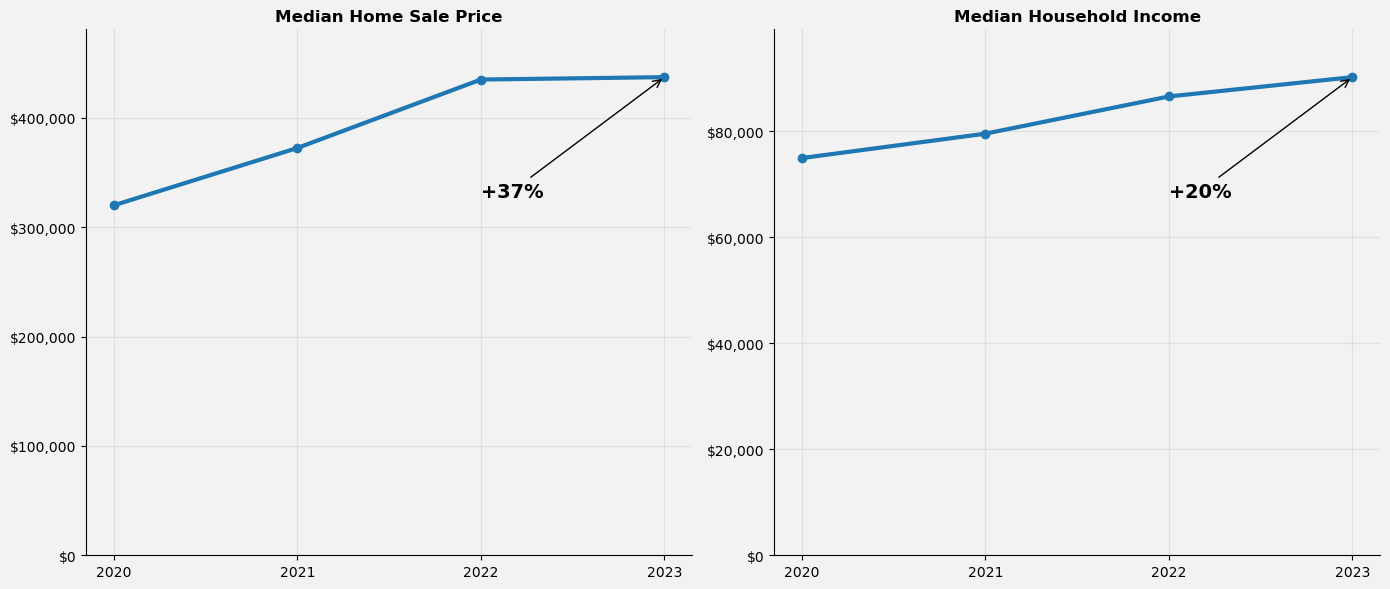

In [55]:
plt.figure(figsize=(14, 6), facecolor='#F2F2F2')
plt.subplot(1, 2, 1)
plt.gca().set_facecolor('#F2F2F2')
plt.plot(metro_trends['Year'],metro_trends['Median_Sale_Price'],linewidth=3,marker='o')
plt.title('Median Home Sale Price', fontweight='bold')
plt.xticks(metro_trends['Year'])
plt.ylim(0, metro_trends['Median_Sale_Price'].max() * 1.1)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(alpha=0.25)
price_growth = ((metro_trends['Median_Sale_Price'].iloc[-1] -metro_trends['Median_Sale_Price'].iloc[0]) /metro_trends['Median_Sale_Price'].iloc[0]) * 100
plt.annotate(
    f"+{price_growth:.0f}%",
    xy=(metro_trends['Year'].iloc[-1],
        metro_trends['Median_Sale_Price'].iloc[-1]),
    xytext=(metro_trends['Year'].iloc[-2],
            metro_trends['Median_Sale_Price'].iloc[-1] * 0.75),
    arrowprops=dict(arrowstyle='->'),
    fontsize=14,
    fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.subplot(1, 2, 2)
plt.gca().set_facecolor('#F2F2F2')
plt.plot(metro_trends['Year'],metro_trends['Median_Household_Income'],linewidth=3,marker='o')
plt.title('Median Household Income', fontweight='bold')
plt.xticks(metro_trends['Year'])
plt.ylim(0, metro_trends['Median_Household_Income'].max() * 1.1)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(alpha=0.25)
income_growth = ((metro_trends['Median_Household_Income'].iloc[-1] -metro_trends['Median_Household_Income'].iloc[0]) /metro_trends['Median_Household_Income'].iloc[0]) * 100
plt.annotate(
    f"+{income_growth:.0f}%",
    xy=(metro_trends['Year'].iloc[-1],
        metro_trends['Median_Household_Income'].iloc[-1]),
    xytext=(metro_trends['Year'].iloc[-2],
            metro_trends['Median_Household_Income'].iloc[-1] * 0.75),
    arrowprops=dict(arrowstyle='->'),
    fontsize=14,
    fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

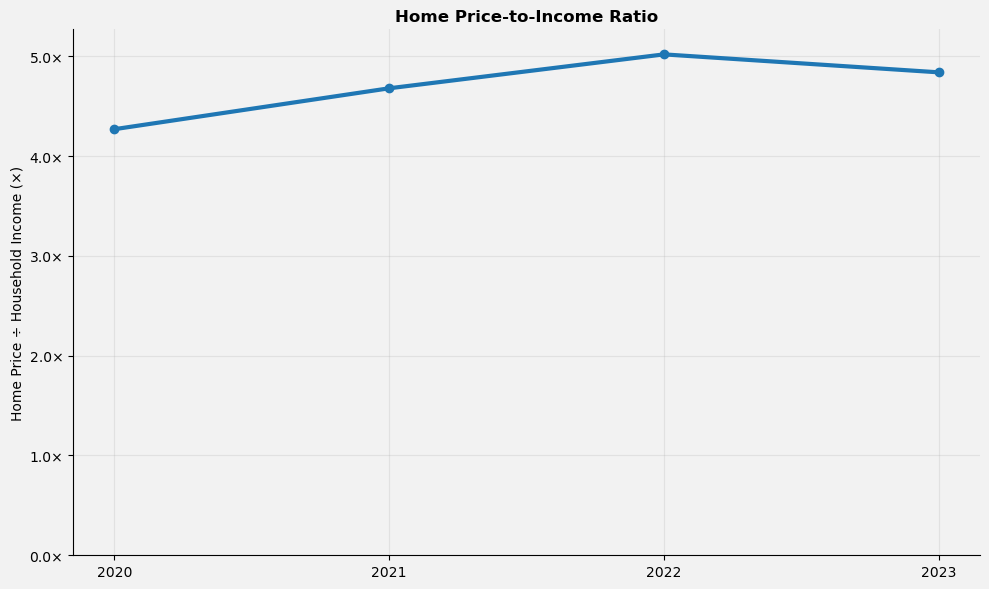

In [56]:
plt.figure(figsize=(10, 6), facecolor='#F2F2F2')
plt.gca().set_facecolor('#F2F2F2')
plt.plot(metro_trends['Year'],metro_trends['Price_to_Income_Ratio'],linewidth=3,marker='o')
plt.title('Home Price-to-Income Ratio', fontweight='bold')
plt.ylabel('Home Price ÷ Household Income (×)')
plt.xticks(metro_trends['Year'])
y_max = metro_trends['Price_to_Income_Ratio'].max()
plt.ylim(0, y_max * 1.05)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:.1f}×'))
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

2. How did housing inventory levels and home sales volume in Metro Nashville change between 2020 and 2023, and how did these market conditions correspond with changes in median home sale prices?

In [57]:
yearly_supply = (redfin_metro.groupby('Year').agg(
        Inventory_Avg=('Inventory', 'mean'),
        Homes_Sold_Total=('Homes Sold', 'sum'),
        Days_on_Market_Median=('Days on Market', 'median')).reset_index())

In [58]:
yearly_supply

,Year,Inventory_Avg,Homes_Sold_Total,Days_on_Market_Median
0,2020,7869.916667,38234,49.0
1,2021,4234.333333,37286,29.0
2,2022,5637.666667,31384,31.5
3,2023,6858.750000,26570,53.0


In [59]:
dollar = FuncFormatter(lambda x, pos: f'${x:,.0f}')
comma = FuncFormatter(lambda x, pos: f'{x:,.0f}')

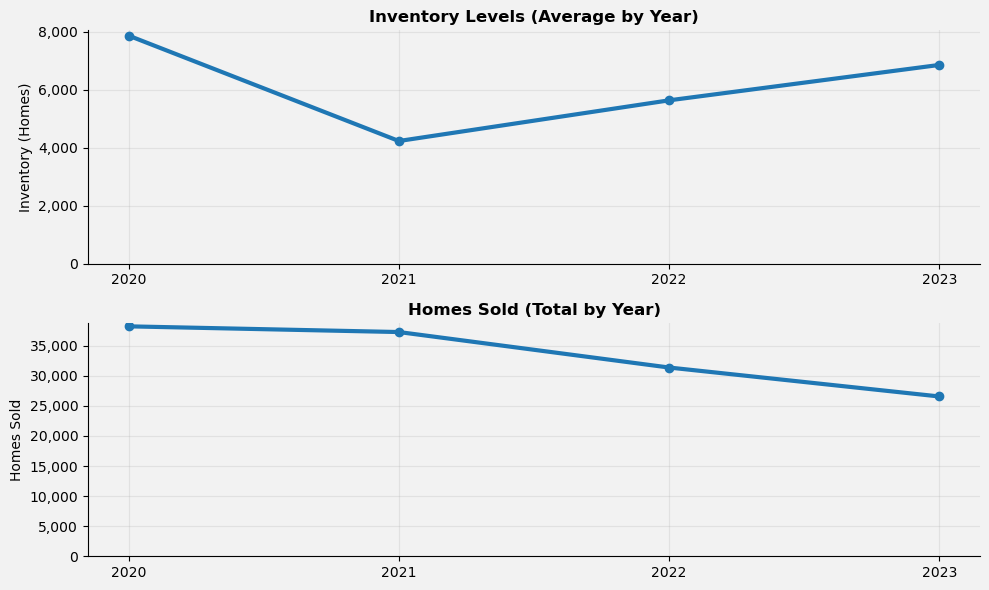

In [60]:
plt.figure(figsize=(10, 6), facecolor='#F2F2F2')
plt.subplot(2, 1, 1)
plt.gca().set_facecolor('#F2F2F2')
plt.plot(yearly_supply['Year'],yearly_supply['Inventory_Avg'],linewidth=3,marker='o')
plt.title('Inventory Levels (Average by Year)', fontweight='bold')
plt.ylabel('Inventory (Homes)')
plt.ylim(bottom=0)
plt.xticks(yearly_supply['Year'])
plt.gca().yaxis.set_major_formatter(comma)
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(2, 1, 2)
plt.gca().set_facecolor('#F2F2F2')
plt.plot(yearly_supply['Year'],yearly_supply['Homes_Sold_Total'],linewidth=3,marker='o')
plt.title('Homes Sold (Total by Year)', fontweight='bold')
plt.ylabel('Homes Sold')
plt.ylim(bottom=0)
plt.xticks(yearly_supply['Year'])
plt.gca().yaxis.set_major_formatter(comma)
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

3. How did changes in 30-year fixed mortgage interest rates between 2020 and 2023 influence homeownership affordability for a median-income household in Metro Nashville?

In [61]:
mortgage_annual = (mortgage_rate.groupby('Year')['MORTGAGE30US'].mean().reset_index(name='Avg_30yr_Rate'))

In [62]:
mortgage_annual

,Year,Avg_30yr_Rate
0,2020,3.111698
1,2021,2.957692
2,2022,5.344038
3,2023,6.806731


In [63]:
mortgage_afford = metro_trends.merge(mortgage_annual,on='Year',how='inner')

In [64]:
mortgage_afford

,Year,Median_Sale_Price,Median_Household_Income,Population,Price_to_Income_Ratio,Avg_30yr_Rate
0,2020,320000.0,74974.0,918645,4.27,3.111698
1,2021,372400.0,79576.0,945873,4.68,2.957692
2,2022,435000.0,86599.0,953305,5.02,5.344038
3,2023,437200.0,90246.0,958043,4.84,6.806731


In [65]:
def monthly_payment(price, rate, down_payment=0.20, years=30):
    loan_amount = price * (1 - down_payment)
    monthly_rate = rate / 100 / 12
    n_payments = years * 12
    return loan_amount * (monthly_rate * (1 + monthly_rate)**n_payments) / ((1 + monthly_rate)**n_payments - 1)
mortgage_afford['Monthly_Payment'] = mortgage_afford.apply(
    lambda row: monthly_payment(row['Median_Sale_Price'],row['Avg_30yr_Rate']),axis=1)

In [66]:
mortgage_afford['Monthly_Income'] = mortgage_afford['Median_Household_Income'] / 12
mortgage_afford['Income_Share_for_Mortgage'] = (mortgage_afford['Monthly_Payment'] /mortgage_afford['Monthly_Income'])

In [67]:
mortgage_afford

,Year,Median_Sale_Price,Median_Household_Income,Population,Price_to_Income_Ratio,Avg_30yr_Rate,Monthly_Payment,Monthly_Income,Income_Share_for_Mortgage
0,2020,320000.0,74974.0,918645,4.27,3.111698,1094.789214,6247.833333,0.175227
1,2021,372400.0,79576.0,945873,4.68,2.957692,1249.255150,6631.333333,0.188387
2,2022,435000.0,86599.0,953305,5.02,5.344038,1941.988170,7216.583333,0.269101
3,2023,437200.0,90246.0,958043,4.84,6.806731,2281.741890,7520.500000,0.303403


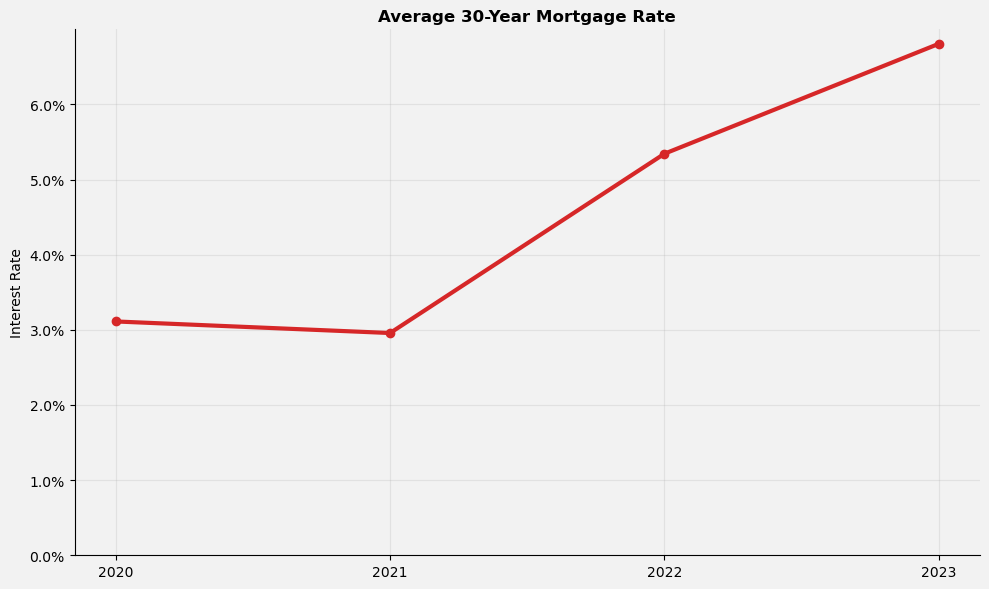

In [68]:
plt.figure(figsize=(10, 6), facecolor='#F2F2F2')
plt.gca().set_facecolor('#F2F2F2')
plt.plot(
    mortgage_afford['Year'],
    mortgage_afford['Avg_30yr_Rate'],
    linewidth=3,
    color='#D62728',
    marker='o')
plt.title('Average 30-Year Mortgage Rate', fontweight='bold')
plt.ylabel('Interest Rate')
plt.xticks(mortgage_afford['Year'])
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{x:.1f}%')
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

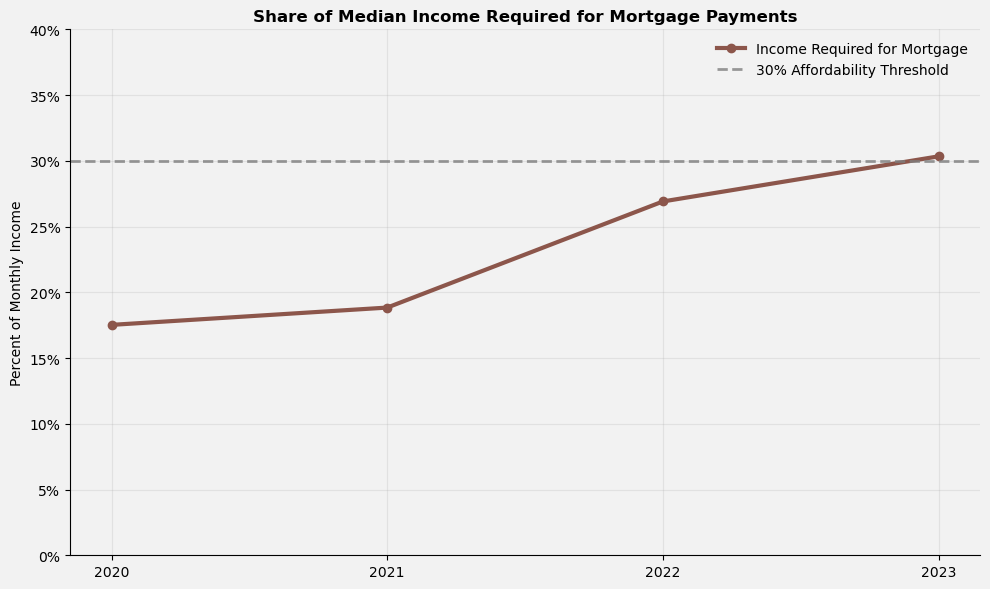

In [69]:
plt.figure(figsize=(10, 6), facecolor='#F2F2F2')
plt.gca().set_facecolor('#F2F2F2')
plt.plot(
    mortgage_afford['Year'],
    mortgage_afford['Income_Share_for_Mortgage'] * 100,
    linewidth=3,
    color='#8C564B', 
    marker='o',
    label='Income Required for Mortgage')
plt.axhline(
    30,
    linestyle='--',
    linewidth=2,
    color='#7F7F7F',
    alpha=0.8,
    label='30% Affordability Threshold')
plt.title('Share of Median Income Required for Mortgage Payments', fontweight='bold')
plt.ylabel('Percent of Monthly Income')
plt.xticks(mortgage_afford['Year'])
plt.yticks(np.arange(0, 41, 5))
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_formatter(lambda x, pos: f'{x:.0f}%')
plt.legend(frameon=False)
plt.grid(alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

4. Were changes in housing affordability evenly distributed across ZIP codes in Metro Nashville between 2020 and 2023, or did certain ZIP codes experience disproportionately larger shifts in affordability?

In [70]:
zip_prices = (single_family_2020_2023.groupby(['Parcel Zip Code','Sale Year'])['Sale Price'].median().reset_index())

In [71]:
zip_prices = zip_prices.rename(columns={
    'Parcel Zip Code': 'ZIP',
    'Sale Year': 'Year',
    'Sale Price': 'Median_Sale_Price'})

In [72]:
zip_prices.head()

,ZIP,Year,Median_Sale_Price
0,37013.0,2020,276900.0
1,37013.0,2021,329637.5
2,37013.0,2022,392500.0
3,37013.0,2023,385000.0
4,37015.0,2020,102000.0


In [73]:
zip_prices_wide = zip_prices.pivot(index='ZIP',columns='Year',values='Median_Sale_Price').reset_index()

In [74]:
zip_prices_wide['ZIP'] = (zip_prices_wide['ZIP'].astype(str).str.replace('.0', '', regex=False).str.zfill(5))

In [75]:
zip_prices_wide.head()

Year,ZIP,2020,2021,2022,2023
0,37013,276900.0,329637.5,392500.0,385000.0
1,37015,102000.0,95750.0,278750.0,250000.0
2,37027,445000.0,540000.0,600000.0,620000.0
3,37064,NaN,2357500.0,1300000.0,2187500.0
4,37072,269935.0,310245.0,350137.0,365331.0


In [76]:
zip_income = (census_data.groupby(['ZCTA','ACS_Year'])['MedianIncome'].median().reset_index().pivot(index='ZCTA', columns='ACS_Year', values='MedianIncome').reset_index())

In [77]:
zip_income['ZCTA'] = (zip_income['ZCTA'].astype(str).str.zfill(5))

In [78]:
zip_income.head()

ACS_Year,ZCTA,2020,2021,2022,2023
0,37013,60602.0,61801.0,67270.0,72233.0
1,37015,59144.0,63755.0,70271.0,74848.0
2,37027,133254.0,135284.0,148564.0,156002.0
3,37064,105342.0,109927.0,114859.0,121492.0
4,37072,62655.0,66475.0,72370.0,75514.0


In [79]:
zip_income_20_23 = zip_income[['ZCTA', 2020, 2023]].copy()

In [80]:
zip_income_20_23.columns = ['ZIP', 'Income_2020', 'Income_2023']

In [81]:
zip_income_20_23.head()

,ZIP,Income_2020,Income_2023
0,37013,60602.0,72233.0
1,37015,59144.0,74848.0
2,37027,133254.0,156002.0
3,37064,105342.0,121492.0
4,37072,62655.0,75514.0


In [82]:
zip_prices_wide['ZIP'] = zip_prices_wide['ZIP'].astype(str)
zip_income_20_23['ZIP'] = zip_income_20_23['ZIP'].astype(str)

In [83]:
zip_afford = zip_prices_wide.merge(zip_income_20_23, on='ZIP', how='inner')

In [84]:
zip_afford.head()

,ZIP,2020,2021,2022,2023,Income_2020,Income_2023
0,37013,276900.0,329637.5,392500.0,385000.0,60602.0,72233.0
1,37015,102000.0,95750.0,278750.0,250000.0,59144.0,74848.0
2,37027,445000.0,540000.0,600000.0,620000.0,133254.0,156002.0
3,37064,NaN,2357500.0,1300000.0,2187500.0,105342.0,121492.0
4,37072,269935.0,310245.0,350137.0,365331.0,62655.0,75514.0


In [85]:
zip_afford = zip_afford.rename(columns={2020: 'Price_2020',2023: 'Price_2023'})

In [86]:
zip_afford['Ratio_2020'] = zip_afford['Price_2020'] / zip_afford['Income_2020']
zip_afford['Ratio_2023'] = zip_afford['Price_2023'] / zip_afford['Income_2023']

In [87]:
zip_afford['Affordability_Change_%'] = ((zip_afford['Ratio_2023'] / zip_afford['Ratio_2020'] - 1) * 100)

In [88]:
zip_afford.head()

,ZIP,Price_2020,2021,2022,Price_2023,Income_2020,Income_2023,Ratio_2020,Ratio_2023,Affordability_Change_%
0,37013,276900.0,329637.5,392500.0,385000.0,60602.0,72233.0,4.569156,5.329974,16.651164
1,37015,102000.0,95750.0,278750.0,250000.0,59144.0,74848.0,1.724604,3.340103,93.673557
2,37027,445000.0,540000.0,600000.0,620000.0,133254.0,156002.0,3.339487,3.974308,19.009537
3,37064,NaN,2357500.0,1300000.0,2187500.0,105342.0,121492.0,NaN,18.005301,NaN
4,37072,269935.0,310245.0,350137.0,365331.0,62655.0,75514.0,4.308275,4.837924,12.293750


In [89]:
top_changes = zip_afford.sort_values('Affordability_Change_%', ascending=False).head(10)

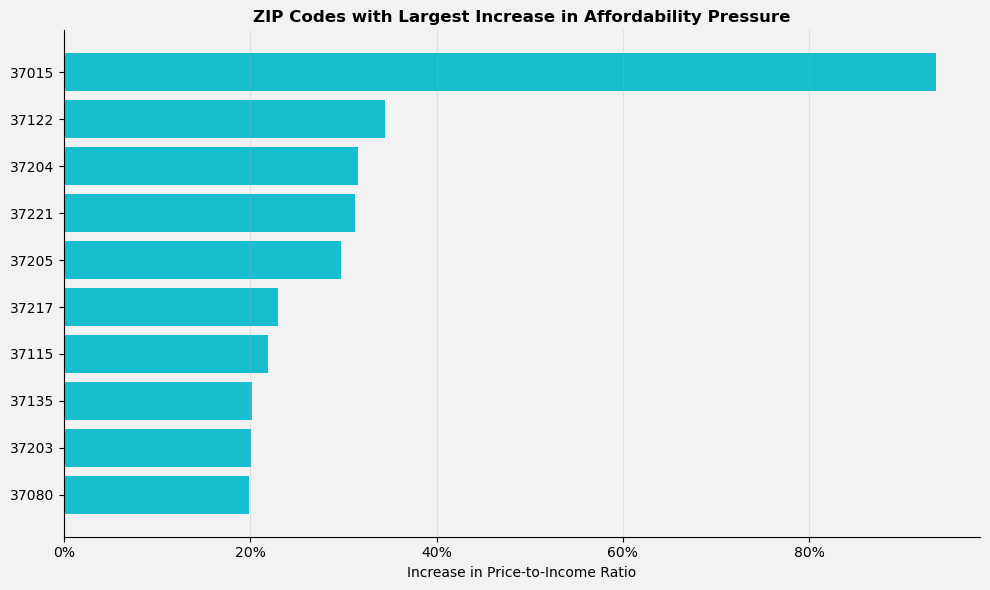

In [90]:
plt.figure(figsize=(10, 6), facecolor='#F2F2F2')
plt.gca().set_facecolor('#F2F2F2')
plt.barh(
    top_changes['ZIP'].astype(str),
    top_changes['Affordability_Change_%'],
    color='#17BECF')
plt.title(
    'ZIP Codes with Largest Increase in Affordability Pressure',
    fontweight='bold')
plt.xlabel('Increase in Price-to-Income Ratio')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(lambda x, pos: f'{x:.0f}%')
plt.grid(axis='x', alpha=0.25)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [91]:
redfin_metro.to_csv('redfin_metro.csv', index=False)

In [92]:
single_family_2020_2023.to_csv('single_family_2020_2023.csv', index=False)

In [93]:
mortgage_rate.to_csv('mortgage_rate.csv', index=False)

In [94]:
census_data.to_csv('census_data.csv', index=False)